#1. Load Dataset

In [2]:
import pandas as pd

df_credit_scores_1 = pd.read_excel("US and Canada Approval Dataset - Credit Scores.xlsx")
df_credit_scores_2 = pd.read_excel("US and Canada Approval Dataset - Credit Scores 2.xlsx")
df_customer_profiles = pd.read_csv("US and Canada Approval Dataset - Customer Profiles.csv")

In [3]:
len(df_credit_scores_1), len(df_credit_scores_2), len(df_customer_profiles)

(33590, 16439, 50029)

In [4]:
df_credit_scores_1.head()

,customer_id,credit_score,credit_history_years,loan_intent,loan_status
0,CUST100435,701,3.0,Education,1
1,CUST101466,766,6.7,Debt Consolidation,1
2,CUST101808,562,1.5,Home Improvement,1
3,CUST101933,707,8.0,Personal,1
4,CUST132978,786,3.4,Debt Consolidation,1


In [5]:
df_credit_scores_2.head()

,customer_id,credit_score,credit_history_years,loan_intent,loan_status
0,CUST107474,644,11.9,Education,1
1,CUST107988,568,3.5,Education,0
2,CUST108411,767,0.1,Education,1
3,CUST109130,729,17.0,Home Improvement,1
4,CUST109444,734,0.0,Business,0


In [6]:
df_customer_profiles.head()

,customer_id,age,occupation_status,years_employed,annual_income,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,product_type,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio
0,CUST100435,35,Employed,16.20,36098,29,14183,0,0,0,Credit Card,500,15.56,0.393,0.014,0.005
1,CUST101466,55,Employed,35.11,20282,3727,4075,0,0,0,Credit Card,500,15.37,0.201,0.025,0.008
2,CUST101808,18,Student,1.11,17921,12,4352,0,1,0,Credit Card,500,21.15,0.243,0.028,0.009
3,CUST101933,33,Employed,13.00,30426,9481,5039,0,1,0,Credit Card,500,15.79,0.166,0.016,0.005
4,CUST132978,54,Self-Employed,1.60,53928,151,9357,0,0,0,Line of Credit,12800,6.00,0.174,0.237,0.079


#2. Concatenate and Merge Dataset

##2.1 Concatenate Credit Scores

In [7]:
print("Jumlah row sebelum concatenation")
print("Jumlah row credit scores 1",len(df_credit_scores_1))
print("Jumlah row credit scores 2",len(df_credit_scores_2))

df_credit_scores = pd.concat([df_credit_scores_1, df_credit_scores_2])
print("\nJumlah row setelah concatenation: ",len(df_credit_scores))

df_credit_scores.head()

Jumlah row sebelum concatenation
Jumlah row credit scores 1 33590
Jumlah row credit scores 2 16439

Jumlah row setelah concatenation:  50029


,customer_id,credit_score,credit_history_years,loan_intent,loan_status
0,CUST100435,701,3.0,Education,1
1,CUST101466,766,6.7,Debt Consolidation,1
2,CUST101808,562,1.5,Home Improvement,1
3,CUST101933,707,8.0,Personal,1
4,CUST132978,786,3.4,Debt Consolidation,1


##2.2 Merge Customer Profiles and Credit Scores Datasets

In [8]:
df = pd.merge(df_credit_scores, df_customer_profiles, how="left", left_on="customer_id", right_on="customer_id")
print(len(df))
df.head()

50093


,customer_id,credit_score,credit_history_years,loan_intent,loan_status,age,occupation_status,years_employed,annual_income,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,product_type,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio
0,CUST100435,701,3.0,Education,1,35,Employed,16.20,36098,29,14183,0,0,0,Credit Card,500,15.56,0.393,0.014,0.005
1,CUST101466,766,6.7,Debt Consolidation,1,55,Employed,35.11,20282,3727,4075,0,0,0,Credit Card,500,15.37,0.201,0.025,0.008
2,CUST101808,562,1.5,Home Improvement,1,18,Student,1.11,17921,12,4352,0,1,0,Credit Card,500,21.15,0.243,0.028,0.009
3,CUST101933,707,8.0,Personal,1,33,Employed,13.00,30426,9481,5039,0,1,0,Credit Card,500,15.79,0.166,0.016,0.005
4,CUST132978,786,3.4,Debt Consolidation,1,54,Self-Employed,1.60,53928,151,9357,0,0,0,Line of Credit,12800,6.00,0.174,0.237,0.079


#3. Deduplication

In [9]:
df[df.duplicated()]

,customer_id,credit_score,credit_history_years,loan_intent,loan_status,age,occupation_status,years_employed,annual_income,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,product_type,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio
21093,CUST128747,607,8.7,Personal,0,34,Employed,0.5,50560,405,29335,0,0,0,Credit Card,21300,20.78,0.580,0.421,0.140
21094,CUST128747,607,8.7,Personal,0,34,Employed,0.5,50560,405,29335,0,0,0,Credit Card,21300,20.78,0.580,0.421,0.140
21095,CUST128747,607,8.7,Personal,0,34,Employed,0.5,50560,405,29335,0,0,0,Credit Card,21300,20.78,0.580,0.421,0.140
21096,CUST128747,607,8.7,Personal,0,34,Employed,0.5,50560,405,29335,0,0,0,Credit Card,21300,20.78,0.580,0.421,0.140
21097,CUST128747,607,8.7,Personal,0,34,Employed,0.5,50560,405,29335,0,0,0,Credit Card,21300,20.78,0.580,0.421,0.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21335,CUST118792,688,17.2,Education,1,53,Employed,30.6,46049,1361,12645,0,0,0,Credit Card,21500,17.36,0.275,0.467,0.156
21336,CUST119039,685,29.2,Personal,1,48,Employed,27.8,42862,3701,15557,0,0,0,Credit Card,21500,17.88,0.363,0.502,0.167
21337,CUST119039,685,29.2,Personal,1,48,Employed,27.8,42862,3701,15557,0,0,0,Credit Card,21500,17.88,0.363,0.502,0.167
21338,CUST119147,665,12.1,Personal,1,38,Employed,12.2,41873,295,5825,0,0,1,Line of Credit,21500,10.41,0.139,0.513,0.171


In [10]:
display(df[df.duplicated()].customer_id.value_counts())
len(df[df.duplicated()].customer_id.value_counts()), len(df[~df.duplicated()].customer_id.value_counts())

,count
customer_id,
CUST128747,15
CUST120085,3
CUST120775,3
CUST121232,3
CUST121387,3
CUST121908,3
CUST141116,3
CUST141430,3
CUST141699,3


(27, 50000)

In [11]:
df[~df.duplicated()].query("customer_id == 'CUST128747'")

,customer_id,credit_score,credit_history_years,loan_intent,loan_status,age,occupation_status,years_employed,annual_income,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,product_type,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio
21092,CUST128747,607,8.7,Personal,0,34,Employed,0.5,50560,405,29335,0,0,0,Credit Card,21300,20.78,0.58,0.421,0.14


In [12]:
df.drop_duplicates(keep="first", inplace=True)
print("Jumlah row setelah deduplicaton: ", len(df))
df.head()

Jumlah row setelah deduplicaton:  50000


,customer_id,credit_score,credit_history_years,loan_intent,loan_status,age,occupation_status,years_employed,annual_income,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,product_type,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio
0,CUST100435,701,3.0,Education,1,35,Employed,16.20,36098,29,14183,0,0,0,Credit Card,500,15.56,0.393,0.014,0.005
1,CUST101466,766,6.7,Debt Consolidation,1,55,Employed,35.11,20282,3727,4075,0,0,0,Credit Card,500,15.37,0.201,0.025,0.008
2,CUST101808,562,1.5,Home Improvement,1,18,Student,1.11,17921,12,4352,0,1,0,Credit Card,500,21.15,0.243,0.028,0.009
3,CUST101933,707,8.0,Personal,1,33,Employed,13.00,30426,9481,5039,0,1,0,Credit Card,500,15.79,0.166,0.016,0.005
4,CUST132978,786,3.4,Debt Consolidation,1,54,Self-Employed,1.60,53928,151,9357,0,0,0,Line of Credit,12800,6.00,0.174,0.237,0.079


#4. Find Missing Values

##4.1 Using missingno

<Axes: >

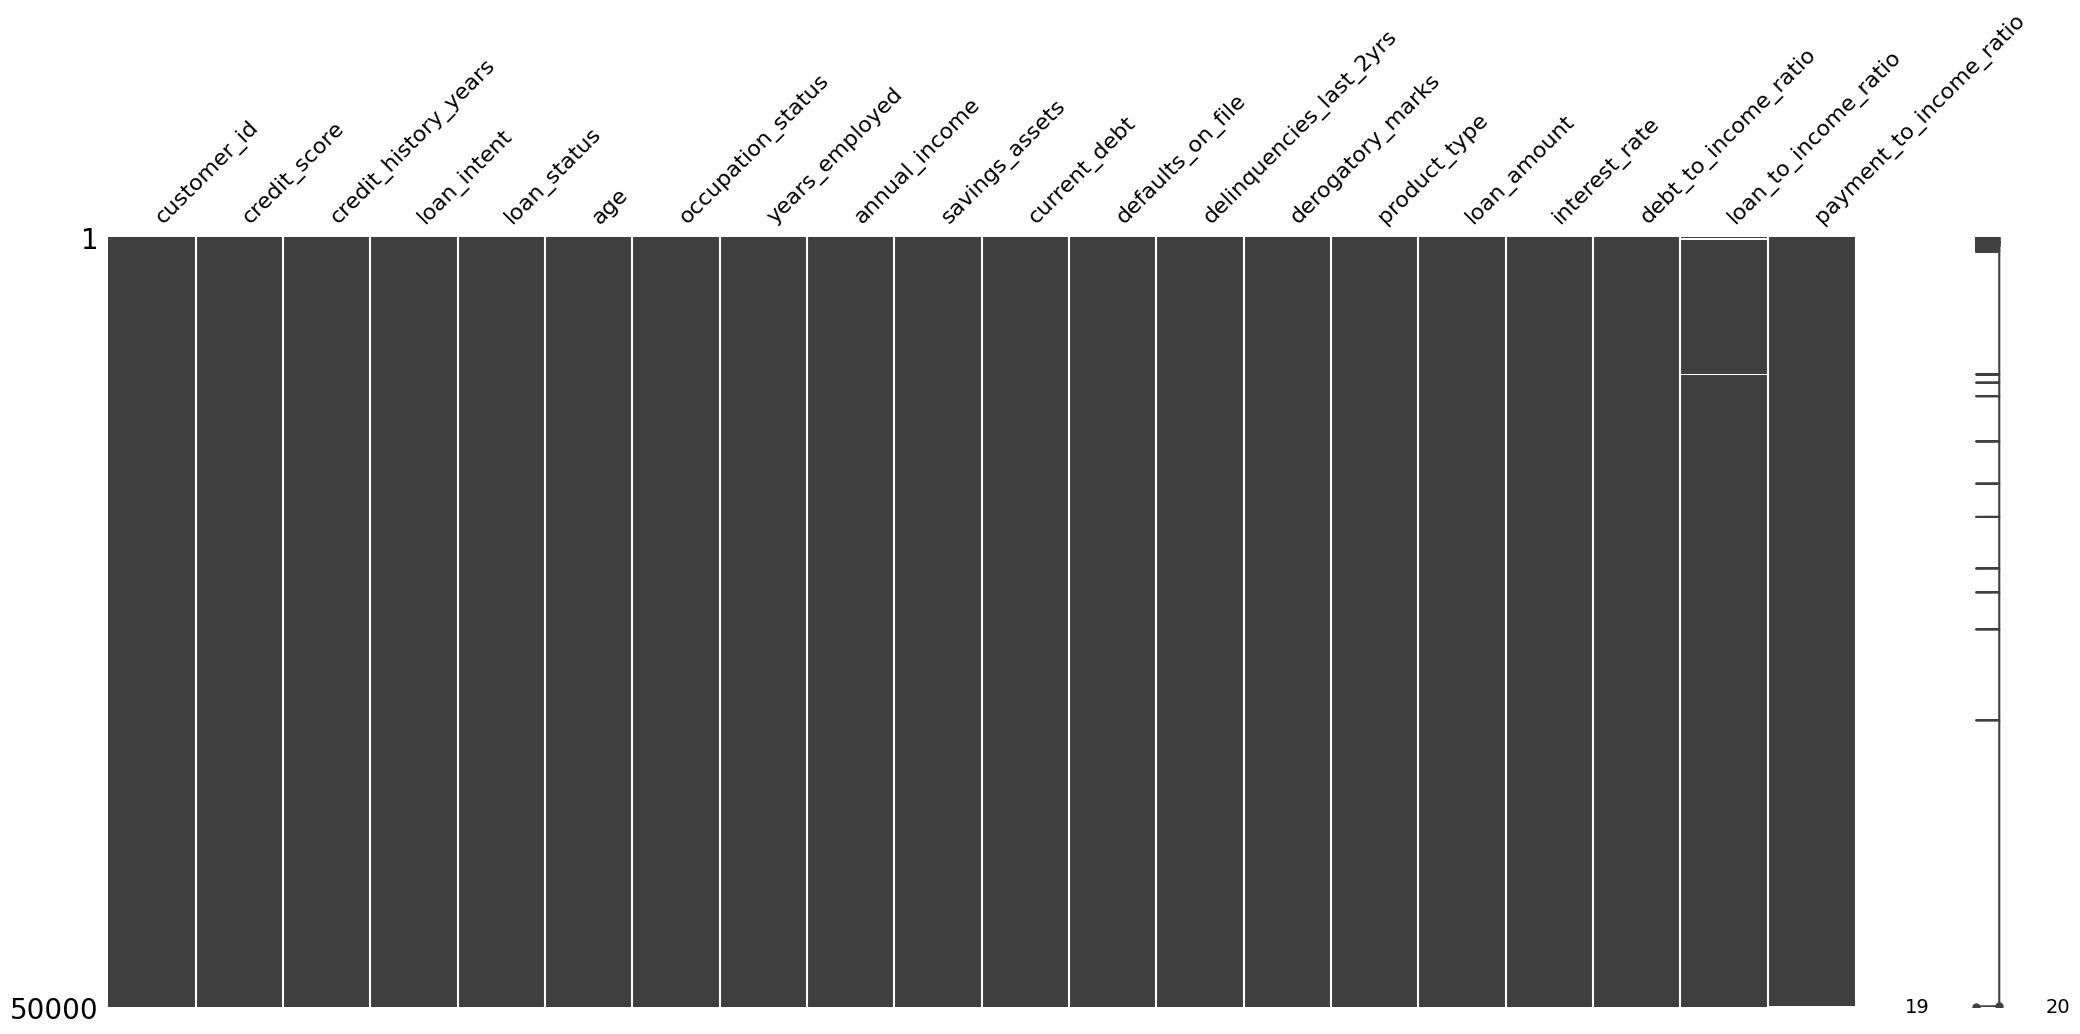

In [13]:
import missingno as missing

%matplotlib inline
missing.matrix(df.sort_values("payment_to_income_ratio"))



##4.2 Using Merely Pandas

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 50092
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              50000 non-null  object 
 1   credit_score             50000 non-null  int64  
 2   credit_history_years     50000 non-null  float64
 3   loan_intent              50000 non-null  object 
 4   loan_status              50000 non-null  int64  
 5   age                      50000 non-null  int64  
 6   occupation_status        50000 non-null  object 
 7   years_employed           50000 non-null  float64
 8   annual_income            50000 non-null  int64  
 9   savings_assets           50000 non-null  int64  
 10  current_debt             50000 non-null  int64  
 11  defaults_on_file         50000 non-null  int64  
 12  delinquencies_last_2yrs  50000 non-null  int64  
 13  derogatory_marks         50000 non-null  int64  
 14  product_type             50

Handling Missing Values in `loan_to_income_ratio`

In [15]:
# df.select_dtypes(include=["int64","float64"]).corr()

In [16]:
df[df['loan_to_income_ratio'] != round(df['loan_amount'] / df['annual_income'],3)][['loan_amount','annual_income','loan_to_income_ratio']]

,loan_amount,annual_income,loan_to_income_ratio
88,500,17689,NaN
89,500,33345,NaN
90,500,21304,NaN
91,500,22196,NaN
92,500,18508,NaN
...,...,...,...
201,800,27828,NaN
202,800,21502,NaN
203,800,29024,NaN
204,800,26445,NaN


In [17]:
df[df['loan_to_income_ratio'].isna()]

,customer_id,credit_score,credit_history_years,loan_intent,loan_status,age,occupation_status,years_employed,annual_income,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,product_type,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio
88,CUST137243,584,0.5,Home Improvement,0,20,Student,1.11,17689,12,4468,0,0,0,Credit Card,500,22.53,0.253,NaN,0.009
89,CUST137404,529,1.2,Debt Consolidation,0,26,Employed,0.10,33345,57,5505,0,0,0,Credit Card,500,21.22,0.165,NaN,0.005
90,CUST137976,680,6.0,Personal,1,30,Employed,6.70,21304,2141,6834,0,0,0,Credit Card,500,17.40,0.321,NaN,0.008
91,CUST138038,678,6.3,Business,0,33,Employed,7.60,22196,179,11907,0,1,0,Credit Card,500,17.25,0.536,NaN,0.008
92,CUST139355,622,2.7,Debt Consolidation,1,21,Employed,2.80,18508,2025,6419,0,0,0,Credit Card,500,19.13,0.347,NaN,0.009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,CUST102951,704,1.4,Education,1,44,Employed,17.70,27828,42,2886,0,0,0,Credit Card,800,16.32,0.104,NaN,0.010
202,CUST105019,617,3.4,Debt Consolidation,0,39,Employed,20.40,21502,1940,10607,0,0,0,Credit Card,800,19.73,0.493,NaN,0.012
203,CUST108029,688,12.5,Debt Consolidation,1,35,Employed,2.00,29024,6994,4713,0,0,0,Credit Card,800,17.73,0.162,NaN,0.009
204,CUST108159,627,5.2,Education,1,25,Employed,6.40,26445,18,2487,0,1,0,Credit Card,800,20.90,0.094,NaN,0.010


In [18]:
import numpy as np
df['loan_to_income_ratio'] = df.apply(lambda x: round(x['loan_amount']/x['annual_income'],3) if np.isnan(x['loan_to_income_ratio']) else x['loan_to_income_ratio'], axis=1)

#sanity check
display(df.query("customer_id == 'CUST109411'"))
df.info()

,customer_id,credit_score,credit_history_years,loan_intent,loan_status,age,occupation_status,years_employed,annual_income,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,product_type,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio
205,CUST109411,739,4.5,Business,1,24,Employed,2.2,19352,48,2005,0,0,0,Credit Card,800,16.23,0.104,0.041,0.014


<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 50092
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              50000 non-null  object 
 1   credit_score             50000 non-null  int64  
 2   credit_history_years     50000 non-null  float64
 3   loan_intent              50000 non-null  object 
 4   loan_status              50000 non-null  int64  
 5   age                      50000 non-null  int64  
 6   occupation_status        50000 non-null  object 
 7   years_employed           50000 non-null  float64
 8   annual_income            50000 non-null  int64  
 9   savings_assets           50000 non-null  int64  
 10  current_debt             50000 non-null  int64  
 11  defaults_on_file         50000 non-null  int64  
 12  delinquencies_last_2yrs  50000 non-null  int64  
 13  derogatory_marks         50000 non-null  int64  
 14  product_type             50

In [19]:
df.query("customer_id == 'CUST109411'")

,customer_id,credit_score,credit_history_years,loan_intent,loan_status,age,occupation_status,years_employed,annual_income,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,product_type,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio
205,CUST109411,739,4.5,Business,1,24,Employed,2.2,19352,48,2005,0,0,0,Credit Card,800,16.23,0.104,0.041,0.014


Handling Missing Value in `payment_to_income_ratio`

In [20]:
df[df.payment_to_income_ratio.isna()]['age'].sort_values()

,age
43645,18
45949,18
49295,18
16504,21
47967,22
41419,24
43987,24
28507,25
29343,27
44680,27


<Axes: >

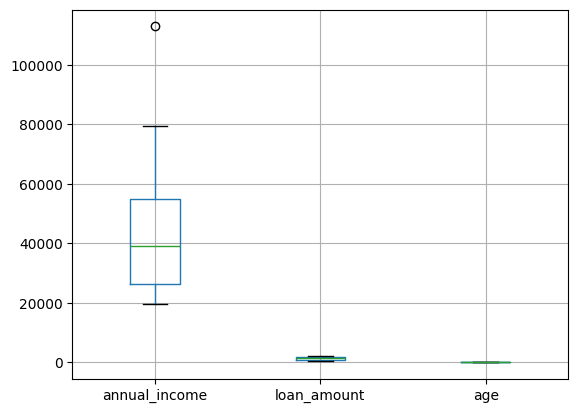

In [21]:
df[df.payment_to_income_ratio.isna()][['annual_income','loan_amount','age']].boxplot()

In [22]:
range_  = range (19670,113000)
df.query("annual_income in @range_")[['payment_to_income_ratio']]

,payment_to_income_ratio
0,0.005
1,0.008
3,0.005
4,0.079
5,0.068
...,...
50087,0.408
50088,0.333
50090,0.152
50091,0.339


In [23]:
# df[df.payment_to_income_ratio.isna()].sort_values("loan_amount")[['loan_amount','payment_to_income_ratio']]
range_  = range (500,2001)
median  = df.query("occupation_status == 'Self-Employed' and loan_amount in @range_")[['payment_to_income_ratio']].median().values[0]
median

np.float64(0.010499999999999999)

In [24]:
df.fillna({"payment_to_income_ratio":median}, inplace=True)

#sanity check
df.query("customer_id == 'CUST127052'")[['loan_amount','payment_to_income_ratio']]

,loan_amount,payment_to_income_ratio
21451,1900,0.0105


#5. Validation / Noise-Checking

##5.1 Validation with Pandera

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 50092
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              50000 non-null  object 
 1   credit_score             50000 non-null  int64  
 2   credit_history_years     50000 non-null  float64
 3   loan_intent              50000 non-null  object 
 4   loan_status              50000 non-null  int64  
 5   age                      50000 non-null  int64  
 6   occupation_status        50000 non-null  object 
 7   years_employed           50000 non-null  float64
 8   annual_income            50000 non-null  int64  
 9   savings_assets           50000 non-null  int64  
 10  current_debt             50000 non-null  int64  
 11  defaults_on_file         50000 non-null  int64  
 12  delinquencies_last_2yrs  50000 non-null  int64  
 13  derogatory_marks         50000 non-null  int64  
 14  product_type             50

In [26]:
pip install pandera

In [27]:
import pandera.pandas as pa
import warnings

rule_credit_score = pa.Check(lambda x: (x >= 300) & (x <= 850))
rule_years_employed = pa.Check(lambda x: x>=0)
rule_debt_to_income_ratio = pa.Check(lambda x: x >=0)

schema = pa.DataFrameSchema({
    "credit_score": pa.Column(int, rule_credit_score),
    "years_employed": pa.Column(float, rule_years_employed),
    "debt_to_income_ratio" : pa.Column(float, rule_debt_to_income_ratio)
})

with warnings.catch_warnings(record=True) as caught_warnings:
  validated_df = schema.validate(df)
  for warning in caught_warnings:
    print(warning.message)


##5.2 Validation Using Mere Pandas

In [28]:
test_dct = {"nama":"riki"}
test_dct.get("name",None)

In [29]:
df['customer_id'].dtype

dtype('O')

In [30]:
rules = {
    "credit_score": (int, 300, 850),
    "years_employed": (float, 0, None)
}

result = True
for rule in rules:
  result = result & (df[rule].dtype == rules[rule][0])
  result = result & (len(df.query(f"{rule} >= {rules[rule][1]}")) == len(df))

  if not rules[rule][-1]:
    pass
  else:
    result = result & (len(df.query(f"{rule} <= {rules[rule][-1]}")) == len(df))

print(result)


True


#6. Formatting Errors

In [31]:
df.years_employed.apply(lambda x: str(x).split(".")[-1].strip()).value_counts()

,count
years_employed,
0,9524
1,8999
5,4640
8,4590
6,4512
2,4486
7,4437
11,4412
4,4400


In [32]:
df['years_employed'] = df['years_employed'].apply(lambda x: int(str(x).split(".")[0]) + round(float(str(x).split(".")[-1])/12, 2))

In [33]:
df.years_employed.head()

,years_employed
0,16.17
1,35.92
2,1.92
3,13.00
4,1.50


#7. Finding Outliers

In [34]:
df.columns

Index(['customer_id', 'credit_score', 'credit_history_years', 'loan_intent',
       'loan_status', 'age', 'occupation_status', 'years_employed',
       'annual_income', 'savings_assets', 'current_debt', 'defaults_on_file',
       'delinquencies_last_2yrs', 'derogatory_marks', 'product_type',
       'loan_amount', 'interest_rate', 'debt_to_income_ratio',
       'loan_to_income_ratio', 'payment_to_income_ratio'],
      dtype='object')

<Axes: >

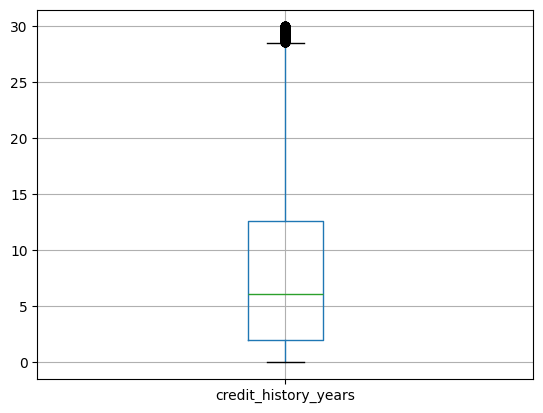

In [35]:
df[['credit_history_years']].boxplot()

In [36]:
round(df['credit_history_years'].describe(),2)

,credit_history_years
count,50000.00
mean,8.17
std,7.21
min,0.00
25%,2.00
50%,6.10
75%,12.60
max,30.00


In [37]:
column_ = "credit_history_years"
mean_, std_, median_, q1_, q3_ = df[column_].describe()[['mean','std','50%','25%','75%']].values
mean_, std_, median_, q1_, q3_

def is_outlier_zscore(val_, mean_=mean_, std_=std_):
  return (val_ - mean_)/std_ > 3 or (val_ - mean_)/std_ < -3

def is_outlier_iqr(val_, q1_=q1_, q3_=q3_):
  iqr_ = q3_ - q1_
  return val_ > q3_ + 1.5*iqr_ or val_ < q1_ - 1.5*iqr_

df['is_outliers'] = df[column_].apply(lambda x: is_outlier_zscore(x))
# df['is_outliers'] = df[column_].apply(lambda x: is_outlier_iqr(x))

In [38]:
df.query("is_outliers == True")

,customer_id,credit_score,credit_history_years,loan_intent,loan_status,age,occupation_status,years_employed,annual_income,savings_assets,...,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,product_type,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,is_outliers
2511,CUST125985,718,29.9,Education,1,49,Student,1.17,24315,5349,...,0,0,0,Credit Card,2400,15.81,0.191,0.099,0.033,True
2514,CUST126920,667,29.8,Home Improvement,1,48,Student,1.00,23651,5869,...,0,0,0,Credit Card,2400,18.87,0.141,0.101,0.034,True
2762,CUST117986,663,30.0,Medical,1,48,Student,2.00,25749,918,...,0,0,0,Credit Card,2600,18.77,0.134,0.101,0.034,True
4930,CUST100651,677,29.9,Medical,0,48,Student,1.50,21045,693,...,0,0,0,Line of Credit,5000,10.01,0.584,0.238,0.079,True
7966,CUST144588,687,29.8,Business,1,54,Employed,35.08,54813,9578,...,0,0,0,Personal Loan,7800,12.45,0.365,0.142,0.047,True
8661,CUST100387,667,29.8,Home Improvement,1,57,Employed,16.17,35830,1325,...,0,0,0,Line of Credit,8600,10.32,0.163,0.240,0.080,True
10665,CUST101269,640,29.9,Personal,1,49,Student,1.50,15000,4171,...,0,0,0,Line of Credit,10600,12.14,0.091,0.707,0.236,True
12904,CUST139338,664,29.9,Medical,0,48,Employed,10.08,64886,191,...,1,1,0,Personal Loan,12700,11.47,0.372,0.196,0.065,True
12924,CUST147589,608,29.9,Personal,1,48,Employed,6.33,17412,3083,...,0,1,0,Line of Credit,12700,12.31,0.157,0.729,0.243,True
15216,CUST131125,695,30.0,Medical,1,53,Employed,22.33,30833,1034,...,0,0,0,Credit Card,15000,18.46,0.325,0.486,0.162,True


In [39]:
# remove
# df = df.query("is_outliers == False")

In [40]:
# impute / capping
print(q3_ + 1.5 * (q3_ - q1_))
df.apply(lambda x: q3_ + 1.5 * (q3_ - q1_) if x['is_outliers'] else x[column_] ,axis=1).iloc[2762]

28.5


np.float64(28.5)

#8. Feature Engineering (Create New Column - Savings_Assets_Ratio)

##8.1 Scaling

In [41]:
# column_ = "annual_income"
# min_, max_ = df[column_].describe()[['min','max']].values
# min_, max_

In [42]:
# def scaling(val_, min_=min_, max_=max_):
#   return (val_ - min_) / (max_ - min_)

# df[column_] = df[column_].apply(scaling)
# df[column_].describe()

##8.2 Create New Column (Savings_Assets_To_Income_Ratio)

<Axes: >

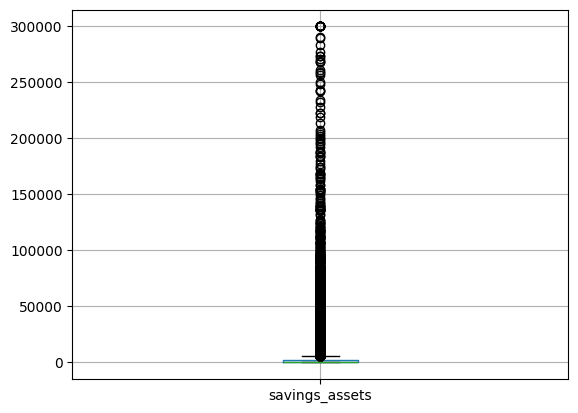

In [43]:
df[['savings_assets']].boxplot()

In [44]:
df[['savings_assets','annual_income']].head()

,savings_assets,annual_income
0,29,36098
1,3727,20282
2,12,17921
3,9481,30426
4,151,53928


In [45]:
df['savings_assets_to_income_ratio'] = round(df['savings_assets'] / df['annual_income'],2)
df['savings_assets_to_income_ratio'].head()

,savings_assets_to_income_ratio
0,0.00
1,0.18
2,0.00
3,0.31
4,0.00


In [46]:
df[['savings_assets_to_income_ratio']].describe()

,savings_assets_to_income_ratio
count,50000.000000
mean,0.066414
std,0.228380
min,0.000000
25%,0.000000
50%,0.010000
75%,0.050000
max,10.140000


#9. Encoding

In [47]:
print(len(df.columns))
df.columns

22


Index(['customer_id', 'credit_score', 'credit_history_years', 'loan_intent',
       'loan_status', 'age', 'occupation_status', 'years_employed',
       'annual_income', 'savings_assets', 'current_debt', 'defaults_on_file',
       'delinquencies_last_2yrs', 'derogatory_marks', 'product_type',
       'loan_amount', 'interest_rate', 'debt_to_income_ratio',
       'loan_to_income_ratio', 'payment_to_income_ratio', 'is_outliers',
       'savings_assets_to_income_ratio'],
      dtype='object')

In [48]:
pd.get_dummies(df.iloc[:,1:], dtype=int)

,credit_score,credit_history_years,loan_status,age,years_employed,annual_income,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,...,loan_intent_Education,loan_intent_Home Improvement,loan_intent_Medical,loan_intent_Personal,occupation_status_Employed,occupation_status_Self-Employed,occupation_status_Student,product_type_Credit Card,product_type_Line of Credit,product_type_Personal Loan
0,701,3.0,1,35,16.17,36098,29,14183,0,0,...,1,0,0,0,1,0,0,1,0,0
1,766,6.7,1,55,35.92,20282,3727,4075,0,0,...,0,0,0,0,1,0,0,1,0,0
2,562,1.5,1,18,1.92,17921,12,4352,0,1,...,0,1,0,0,0,0,1,1,0,0
3,707,8.0,1,33,13.00,30426,9481,5039,0,1,...,0,0,0,1,1,0,0,1,0,0
4,786,3.4,1,54,1.50,53928,151,9357,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50088,594,6.5,0,50,22.50,99958,361,33078,0,2,...,1,0,0,0,1,0,0,0,0,1
50089,611,13.5,0,55,24.42,150747,4700,59826,0,2,...,0,1,0,0,1,0,0,0,0,1
50090,592,0.3,0,19,1.00,42628,3,14266,0,1,...,0,0,0,1,0,1,0,1,0,0
50091,537,0.1,0,22,1.00,48713,10,14583,0,1,...,0,0,0,0,0,1,0,1,0,0
